# Create an Analytical Dataset

## Project Overview

This project is the first part of a two-part series. In the first part, we will blend and format data and deal with outliers.

For the second part, we will use our cleaned up dataset to create another linear regression model. The difference this time is that we will have to choose which variable(s) are the most important for the model using new techniques learned in the Selecting Predictor Variables section.

## Scenario

***Pawdacity*** is a leading pet store chain in Wyoming with 13 stores throughout the state. This year, Pawdacity would like to expand and open a 14th store. Your manager has asked you to perform an analysis to recommend the city for Pawdacity’s newest store, based on predicted yearly sales.

To do this analysis we are given datasets:

- The monthly sales data for all of the Pawdacity stores for the year 2010.
- NAICS data on the most current sales of all competitor stores where total sales is equal to 12 months of sales.
- A partially parsed data file that can be used for population numbers.
- Demographic data (Households with individuals under 18, Land Area, Population Density, and Total Families) for each city and county in the state of Wyoming. For people who are unfamiliar with the US city system, a state contains counties and counties contains one or more cities.


# 1. Understanding the data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Set colummn and row options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
# Load the datasets
pawda_city= pd.read_csv('p2-data/p2-2010-pawdacity-monthly-sales-p2-2010-pawdacity-monthly-sales.csv')
census = pd.read_csv('p2-data/p2-partially-parsed-wy-web-scrape.csv')
naics = pd.read_csv('p2-data/p2-wy-453910-naics-data.csv')
demography = pd.read_csv('p2-data/p2-wy-demographic-data.csv')

In [5]:
# Explore the pawdacity datasets
pawda_city.head()

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792


In [6]:
# Explore the census population datasets
census.head()

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>


In [7]:
# Explore demography datasets
demography.head()

,City,County,Land Area,Households with Under 18,Population Density,Total Families
0,Laramie,Albany,2513.745235,2075,5.19,4668.93
1,Rock River,Albany,200.444000,165,0.41,372.30
2,Basin,Big Horn,543.951304,250,0.66,566.43
3,Burlington,Big Horn,137.646214,63,0.17,143.34
4,Byron,Big Horn,252.489592,116,0.31,262.93


# 2. Data Preparation

## 1. Parsing and Trasforming Dataset

First, we need to parse partialy parsed dataset: census population dataset

In [8]:
# Explore the dataset
census.head()

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>


As we can see the above dataframe, the columns values are not parsed and transformed into right format. Therefore, we are going to parse the above dataset.
Then, first we remove the html tags:-

In [9]:
# Method to remove html tag using regular expression
def remove_tags(string):
    result = re.sub('<.*?>', '', string)
    return result

In [10]:
# The method to apply remove_tags method to all columns
def apply_colmn(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: remove_tags(x))
        
        
apply_colmn(census, ['2014 Estimate', '2010 Census', '2000 Census'])

In [11]:
# Let's explore the parsed dataset
census

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"1,968","1,911","1,818"
1,Albin|Laramie,185,181,120
2,Alpine|Lincoln,845,828,550
3,Baggs|Carbon,439,440,348
4,Bairoil|Sweetwater,107,106,97
5,Bar Nunn|Natrona,"2,735","2,213",936
6,Basin ?|Big Horn,"1,312","1,285[4]","1,238"
7,Bear River|Uinta,521,518,-
8,Big Piney|Sublette,538,552,408
9,Buffalo ?|Johnson,"4,615","4,585","3,900"


Now the html tags are removed but there are other characters such as `comma, [], -`. These characters are not needed for data analysis. Also, from row 99 to 102 are missing the data.

In [12]:
# Method to remove special characters from the dataset
def remove_characters(df, colns):
    for col in colns:
        
        df[col] = df[col].str.replace(r'\[.*\]', '', regex=True)
        df[col] = df[col].str.replace(',', '', regex=True)  
        df[col] = df[col].str.replace('-', '', regex=True) 
        
        
remove_characters(census, ['2014 Estimate', '2010 Census', '2000 Census'])

In [13]:
# Drop NaN values from the dataset
census.dropna(axis=0, inplace=True)

In [14]:
# Let's check the types of the data
census.dtypes

City|County      object
2014 Estimate    object
2010 Census      object
2000 Census      object
dtype: object

Yeah, the data types of all columns are string but the numbers should be transformed into integer except the first column.

In [15]:
# method to convert string to numeric
def toNumeric(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col])
        
toNumeric(census,  ['2014 Estimate', '2010 Census', '2000 Census'])

We have parsed and converted the types of the data but the first column `City|County` is not parsed. Therefore, we will parse and create separate columns as follow: 

In [16]:
# First, we split the column values based on | character into list
census['City|County'] = census['City|County'].apply(lambda x: x.split('|'))

In [17]:
census.head()

,City|County,2014 Estimate,2010 Census,2000 Census
0,"[Afton, Lincoln]",1968,1911,1818.0
1,"[Albin, Laramie]",185,181,120.0
2,"[Alpine, Lincoln]",845,828,550.0
3,"[Baggs, Carbon]",439,440,348.0
4,"[Bairoil, Sweetwater]",107,106,97.0


In [18]:
# Then, we select index 0 as city and index 1 as county and also remove special characters and spaces.
census['City'] = census['City|County'].apply(lambda x: x[0].replace('?', '').strip())
census['County'] = census['City|County'].apply(lambda x: x[1].replace('?', '').strip())

In [19]:
census.head()

,City|County,2014 Estimate,2010 Census,2000 Census,City,County
0,"[Afton, Lincoln]",1968,1911,1818.0,Afton,Lincoln
1,"[Albin, Laramie]",185,181,120.0,Albin,Laramie
2,"[Alpine, Lincoln]",845,828,550.0,Alpine,Lincoln
3,"[Baggs, Carbon]",439,440,348.0,Baggs,Carbon
4,"[Bairoil, Sweetwater]",107,106,97.0,Bairoil,Sweetwater


Now we have parsed and created a separate column for `City|County`. So, we drop it because it is no longer needed.

In [20]:
census.drop(columns=['City|County'], inplace=True)

In [21]:
census.head()

,2014 Estimate,2010 Census,2000 Census,City,County
0,1968,1911,1818.0,Afton,Lincoln
1,185,181,120.0,Albin,Laramie
2,845,828,550.0,Alpine,Lincoln
3,439,440,348.0,Baggs,Carbon
4,107,106,97.0,Bairoil,Sweetwater


We have parsed the census population dataset and made it ready for analyis.

## 2. Data Blending and Formating

Next, we have to blending the separate dataset together

First, we have to calculate the total sales of pawdacity in 2010.

In [22]:
# Calculate the total sales of pawdacity from January to December 2010 
pawda_city['Total Pawdacity Sales'] = pawda_city.loc[:, 'January':'December'].sum(axis=1)
pawda_city.head()

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December,Total Pawdacity Sales
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848,185328
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648,317736
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920,917892
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632,218376
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792,208008


In [23]:
# Then, select CITY and Total Pawdacity Sales columns

total_pawdacity = pawda_city.loc[:, ['CITY', 'Total Pawdacity Sales']].rename(columns={'CITY':'City'})
total_pawdacity.head()

,City,Total Pawdacity Sales
0,Buffalo,185328
1,Casper,317736
2,Cheyenne,917892
3,Cody,218376
4,Douglas,208008


Now we merge census and demography dataset on the same City name

In [24]:
census_demography = pd.merge(census, demography, on=['City', 'County'])

In [25]:
# Drop columns because we need 2010 census data only for this analysis.
census_demography.drop(columns=['2014 Estimate', '2000 Census', 'County'], inplace=True)

In [26]:
census_demography.head()

,2010 Census,City,Land Area,Households with Under 18,Population Density,Total Families
0,1911,Afton,853.806650,497,0.93,1040.41
1,181,Albin,7.685902,37,0.10,74.87
2,828,Alpine,366.598892,213,0.40,446.72
3,440,Baggs,253.240322,62,0.06,129.53
4,106,Bairoil,29.459830,18,0.01,33.70


Finally, we create training dataset by merging total sales of pawdacity and census_demography data on the same City name.

In [27]:
train_dataset = census_demography.merge(total_pawdacity, on='City', sort=False).rename(columns={'2010 Census':'2010 Census Population'})


In [28]:
train_dataset

,2010 Census Population,City,Land Area,Households with Under 18,Population Density,Total Families,Total Pawdacity Sales
0,4585,Buffalo,3115.507500,746,1.55,1819.50,185328
1,35316,Casper,3894.309100,7788,11.16,8756.32,317736
2,59466,Cheyenne,1500.178400,7158,20.34,14612.64,917892
3,9520,Cody,2998.956960,1403,1.82,3515.62,218376
4,6120,Douglas,1829.465100,832,1.46,1744.08,208008
5,12359,Evanston,999.497100,1486,4.95,2712.64,283824
6,29087,Gillette,2748.852900,4052,5.80,7189.43,543132
7,6314,Powell,2673.574550,1251,1.62,3134.18,233928
8,10615,Riverton,4796.859815,2680,2.34,5556.49,303264
9,23036,Rock Springs,6620.201916,4022,2.78,7572.18,253584


We have created our training dataset. This dataset will help us to predict the sales of the current year to open a new store. Our training dataset has 11 rows and 7 columns.


In [29]:
train_dataset.to_csv('p2-data/train.csv', index=False)

# 3. Clean the data.
Next, we clean the training dataset if there are missing values, duplicated rows, and other data issues.

In [30]:
# Let's check missing values
train_dataset.isnull().sum()

2010 Census Population      0
City                        0
Land Area                   0
Households with Under 18    0
Population Density          0
Total Families              0
Total Pawdacity Sales       0
dtype: int64

In [31]:
# Check dupliates
train_dataset.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

Therefore, there are no missing values and duplicated rows in our newly created dataset.

Now we will create a summay table that contains the sum and average of the numeric columns.

In [32]:
sumation= train_dataset.sum(numeric_only=True).round(2).reset_index(name='Sum')
average = train_dataset.mean().round(2).reset_index(name='Average')

summary_result = sumation.merge(average, on='index').rename(columns={'index':'Column'})

In [33]:
summary_result

,Column,Sum,Average
0,2010 Census Population,213862.00,19442.00
1,Land Area,33071.38,3006.49
2,Households with Under 18,34064.00,3096.73
3,Population Density,62.80,5.71
4,Total Families,62652.79,5695.71
5,Total Pawdacity Sales,3773304.00,343027.64


The above table is the summay results along with sumation and average of each variables.

# 4. Identify and deal with outliers

<p>To check for outliers, let’s start with some boxplot to visualize and identify the outliers of each predictor variables. Since there are 5 predictor variables, let’s plot in five boxplot using seaborn library.</p>

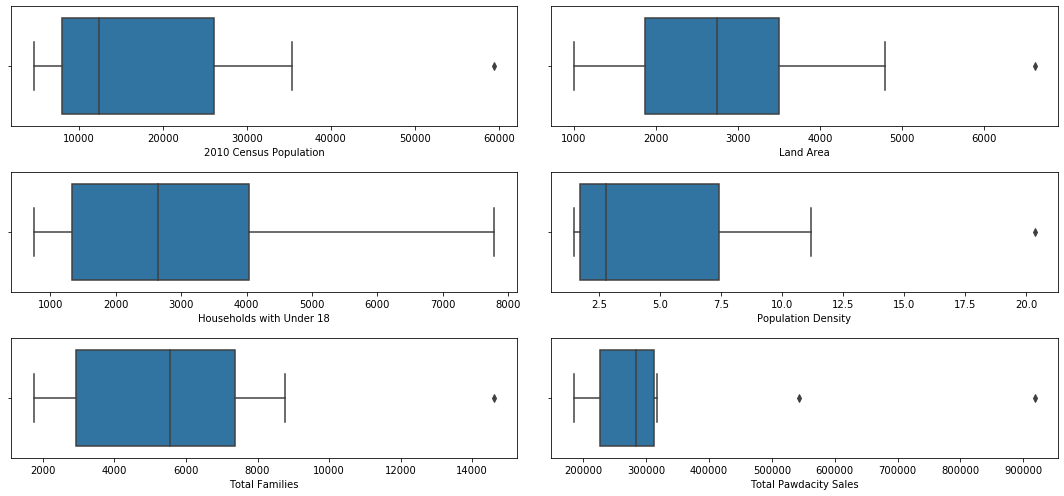

In [45]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(321)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='2010 Census Population', ax=ax1)

ax2 = fig.add_subplot(322)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='Land Area', ax=ax2)

ax3 = fig.add_subplot(323)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='Households with Under 18', ax=ax3)

ax4 = fig.add_subplot(324)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='Population Density', ax=ax4)

ax5 = fig.add_subplot(325)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='Total Families', ax=ax5)

ax6 = fig.add_subplot(326)
fig.tight_layout()
sns.boxplot(data=train_dataset, x='Total Pawdacity Sales', ax=ax6)

plt.savefig("p2-outliers", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
plt.show()

From the above boxplot we can understand that:
- 2010 Census Population has 1 outlier which is found at value of 59466.
- Land area has 1 outlier which is found at value of 6620.201916.
- Households wiht Under 18 has no outlier. So, that is great.
- Population Density has 1 outlier which is found at value of 20.34
- Total Families has 1 outlier which is found at value of 14612.64
- Total Pawdacity has 2 outliers which are found at values of 917892 and 543132.

We also calculate the `Q1, Q3, IQR, Lower Fence, Upper Fence and outlier` in the following.

In [ ]:
def outliers(df, cols):
    quantile_dict = {}
    outlier_dict = {}
    for col in cols:
        q3 = np.quantile(df[col], 0.75)
        q1 = np.quantile(df[col], 0.25)
        iqr = q3 - q1
        
        # finding upper and lower whiskers
        upper_fence = q3+(1.5*iqr)
        lower_fence = q1-(1.5*iqr)
        
        outlier = df.loc[((df[col] <= lower_fence) | (df[col]>= upper_fence))][[col]]
        outlier1 = df.loc[((df[col] <= lower_fence) | (df[col]>= upper_fence))][['City', col]]
        
        outlier_dict[col] = [q1, q3, iqr, upper_fence, lower_fence, outlier.values]
        outlier_dict[col] = outlier.col.values
    return outlier_dict

In [47]:
outlier = outliers(train_dataset, ['2010 Census Population', 'Land Area', 
                         'Population Density', 'Total Families', 'Total Pawdacity Sales'])
pd.DataFrame(outlier).set_index(pd.Index(['Q1', 'Q3', 'IQR', 'Upper Fence', 'Lower Fence', 'Outliers']))

,City,2010 Census Population
2,Cheyenne,59466


,City,Land Area
9,Rock Springs,6620.201916


,City,Population Density
2,Cheyenne,20.34


,City,Total Families
2,Cheyenne,14612.64


,City,Total Pawdacity Sales
2,Cheyenne,917892
6,Gillette,543132


,2010 Census Population,Land Area,Population Density,Total Families,Total Pawdacity Sales
Q1,7917.0,1861.721074,1.72,2923.41,226152.0
Q3,26061.5,3504.9083,7.39,7380.805,312984.0
IQR,18144.5,1643.187226,5.67,4457.395,86832.0
Upper Fence,53278.25,5969.689139,15.895,14066.8975,443232.0
Lower Fence,-19299.75,-603.059765,-6.785,-3762.6825,95904.0
Outliers,[[59466]],[[6620.201916]],[[20.34]],[[14612.64]],"[[917892], [543132]]"


The calculations are performed and the outliers are detected in the above summary table. Therefore, we can drop the outliers by selecting the data above the Lower Fence and below the Upper Fence values.

# Project Report

# Step 1: Business and Data Understanding
Provide an explanation of the key decisions that need to be made. (250 word limit)
Key Decisions:

Answer these questions

1. What decisions needs to be made?

Ans: The manager need to be made the decision is that "Where should be the new store opened based on the predicted sales of the current year?"

2. What data is needed to inform those decisions?

Ans: To made this analysis, I have used the following datasets:

1. Th The monthly sales data for all of the Pawdacity stores for the year 2010. This data is calculated from the 12 months of Pawdacity sales.
2. Demography dataset:- Demographic data (Households with under 18, Land Area, Population Density, and Total Families) for each city and county in the state of Wyoming.
3. 2010 Census Population: This is parsed and extracted from the partially parsed dataset which contains the census population data.

Then, I cleaned the dataset and blending together for each city and county in the state of Wyoming. Finally, I have found the following predictor variables:
- `City`
- `2010 Census Population` : The population of 2010 each city
- `Land Area` :  Land Area of each city
- `Households with Under 18` : Households of with Individual under 18
- `Population Density` : Population density of each city in 2010
- `Total Families` : Total families of each city in 2010

And `Total Pawdacity Sales` as Target variable.

N.B: `City` will not help us to predict the sales.

# Step 2: Building the Training Set
Build your training set given the data provided to you. Your column sums of your dataset should match the sums in the table below.

In addition provide the averages on your data set here to help reviewers check your work. You should round up to two decimal places, ex: 1.24

I have built the training set with 6 columns and 11 rows. The following table summary shows the statistical summary of each  variables of the training dataset.

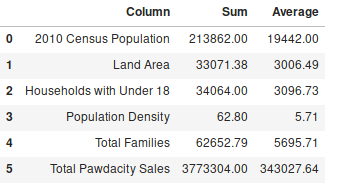

# Step 3: Dealing with Outliers
Answer these questions

Are there any cities that are outliers in the training set? Which outlier have you chosen to remove or impute? Because this dataset is a small data set (11 cities), you should only remove or impute one outlier. Please explain your reasoning.


I have detected the outliers of each variables using the boxplot.

![image.png](p2-outliers.png)

From the above boxplot we can understand that:
- 2010 Census Population has 1 outlier which is found the value of 59466.
- Land area has 1 outlier which is found at value of 6620.201916.
- Households with Under 18 has no outlier. So, that is great.
- Population Density has 1 outlier which is found at value of 20.34
- Total Families has 1 outlier which is found at value of 14612.64
- Total Pawdacity Sales has 2 outliers which are found at values of 917892 and 543132.

I also calculated the `Q1, Q3, IQR, Lower Fence, Upper Fence and outlier` in the following.

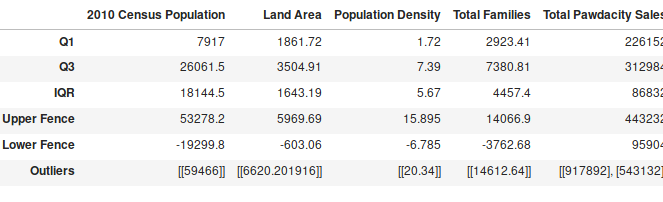


The following table shows the city and the variable that has an outlier.

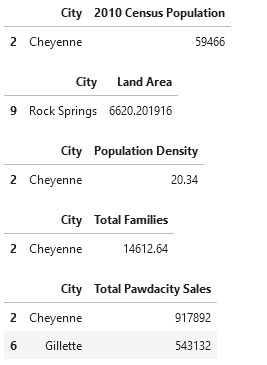


As we seen in the above table four variables has an outlier at the city of Cheyenne. But Cheyenne has large population density so we keep it.

But dropping all outliers are not a solution because we have too small data for predicting the sales of the current year. In my opinion, I drop the outlier at the city of Gillette the reason is that there are two outliers occurred at the Total Pawdacity Sales variable therefore we drop one outlier and keep the other.